# Automatizce ve fyzice: ML

Tomáš Červeň + Petr Čermák  
2023-12-01

## Připojte se

{{< qrcode https://cermak.science/teaching/automation/lectures/09-ml/presentation.html >}}

[cermak.science/teaching/automation/lectures/09-ml/presentation.html](https://cermak.science/teaching/automation/lectures/09-ml/presentation.html)

# AI, ML, DL and all that

## Machine Learning

-   automatické spracovanie či učenie sa z dát
-   cieľom je určiť *(podmienenú)* distribúciu
    $$ p_{\mathrm{model}}(\mathbf{x} \vert \theta) $$ zo vzorky
    (nezávislých) dát $\mathbb{X}$
-   MLE/ME - distribúciu volíme tak, aby maximalizovala vierohodnosť
    vzorky

## Voľba modelu

-   supervised $D = {(\mathbf{x}_{i}, \mathbf{y}_{i})}_{i=1}^{N}$
    -   kategorická či nominálna predpoveď
-   unsupervised $D = {(\mathbf{x}_{i})}_{i=1}^{N}$
    -   clustering, latntné faktory, grafy, dopĺňanie matíc …
-   reinforced
    -   odozva na stav prostredia a odmenu akcie

## Maybe Attention Is Not Always All You Need

-   závisí na forme vstupu, spracovaní dát
-   klasické modely ako
    -   lineárna či logistická regresia,
    -   perceptron,
    -   kNN (*K-Nearest Neighbors Algorithm*),
    -   SVM (*support vector machine*),
    -   DT (*Decision tree*),
    -   PCA (*Principal Component Analysis*) …
-   konvolučné a rekurentné siete, transformery, generatívne siete, DM
    (*data mining*), NF …
-   DRL (*Deep reinforcement learning*)

## Príklad

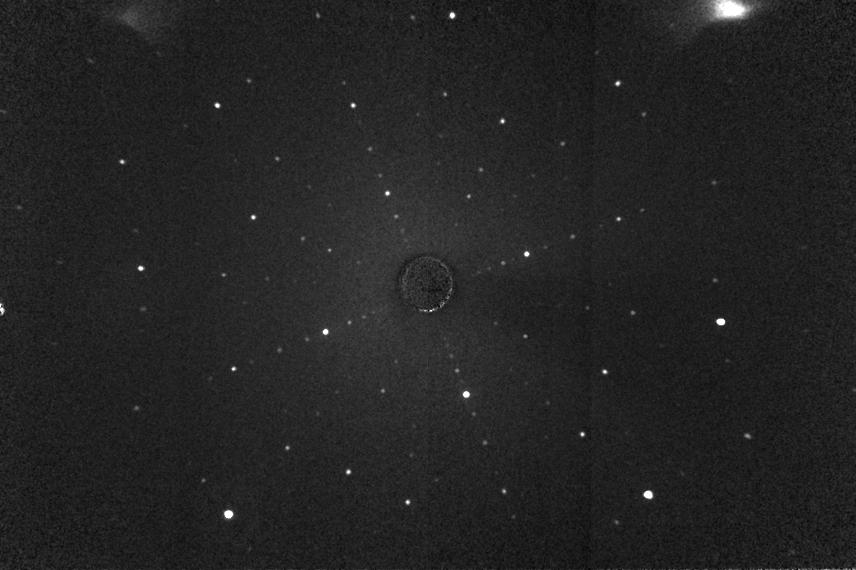

## Tréning

-   hyperparametre, rozdelenie dát
-   MLE
-   $\theta \leftarrow \theta - \alpha \nabla_\theta E(\theta)$

## Príklad - Lineárna regresia

-   predikuje reálnu hodnotu ako
    $y(\mathbf{x} \vert \mathbf{w}, b) = \mathbf{x} \cdot \mathbf{w} + b$
-   majme dataset $D = {(\mathbf{x}_{i}, t_{i})}_{i=1}^{N}$
-   aplikácia MLE vedie na minimalizáciu MSE a tá na
    $\mathbf{w} = \left(\mathbf{X}^{\mathrm{T}}\mathbf{X}\right)^{-1}\mathbf{X}^{\mathrm{T}}\mathbf{t}$

## Zdroje

-   [Trilógia by Milan
    Straka](https://ufal.mff.cuni.cz/milan-straka/teaching) (klasický ML
    po novom učí Libovický)
-   Kevin P. Murphy - Machine Learning: A Probabilistic Perspective
-   Goodfellow et al. - Deep Learning Book

# Cvičení

## Kritická teplota

-   preskúmajte dataset pre predikciu kritickej teploty
-   rozdeľte data na trénovaciu a testovaciu množinu (test_size = 0.1)
-   vytvorte regresný model
-   vytvorte model s čo najmenšou MSE

## Kritická teplota

Linear Regression MSE:  293.90818591736786

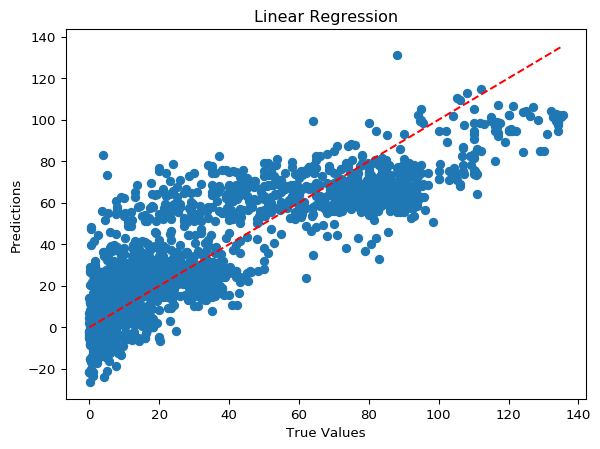

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Načítanie data zo súboru
data = pd.read_csv('practicals/SCProperties.csv')

# Preprocessing
k = 0
relevant_features = data.corr()['critical_temp'].abs().sort_values(ascending=False)[1:k+1].index.tolist()
X = data[relevant_features] if k > 0 else data.drop('critical_temp', axis=1)
y = data['critical_temp']

# Rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)

# Lineárny regresný model
linear = LinearRegression().fit(X_train, y_train)
linear_predictions = linear.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print('Linear Regression MSE: ', linear_mse)

# Zobrazenie výsledkov
max_T = max(y_test)
plt.scatter(y_test, linear_predictions)
plt.plot([0, max_T], [0, max_T], 'r--')
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()